# Problem Statement

Many businesses rely on manual or delayed methods (e.g., surveys, focus groups) to gauge customer satisfaction, which is not scalable or timely.
Identifying and addressing dissatisfaction early can reduce churn, which is often more expensive than acquiring new customers.

# Objective:

To develop a predictive model that can accurately estimate customer satisfaction scores based on demographic, behavioral, and feedback-related features.

# Dataset:

The dataset was obtained from kaggle

The Customer Feedback and Satisfaction Dataset is a synthetic dataset designed to analyze and predict customer satisfaction based on various demographic and behavioral factors. It contains data for 38,444 customers, capturing their feedback on products and services in a structured format. This dataset is particularly useful for data scientists and machine learning practitioners looking to explore customer satisfaction metrics and develop predictive models for practice

#### Let's train the Model:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
df = pd.read_csv('customer_feedback_satisfaction.csv')

In [3]:
# First Five Rows of the Dataset:
df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [4]:
#Last Five Rows of the Dataset:
df.tail()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
38439,38440,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,38443,28,Female,USA,105587,7,5,16,High,Silver,100.00
38443,38444,64,Female,Canada,105379,2,2,8,High,Bronze,71.81


# Data Exploration:

In [5]:
# rows and columns
df.shape

(38444, 11)

In [6]:
# all columns 
df.columns.unique()

Index(['CustomerID', 'Age', 'Gender', 'Country', 'Income', 'ProductQuality',
       'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel',
       'SatisfactionScore'],
      dtype='object')

In [7]:
#  summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [8]:
#check for null vallues
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [9]:
#descriptinve statistics 
df.describe()

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


# Explanation:

The dataset provides insights into customer demographics, behaviors, and satisfaction, featuring key variables like Age, Income, ProductQuality, ServiceQuality, PurchaseFrequency, and SatisfactionScore.

The average customer is 43 years old with an annual income of $75,076, and their ratings for product and service quality hover around 5.5 on a 10-point scale, reflecting moderate satisfaction levels.
 
Customers typically make ~10 purchases annually, with satisfaction scores averaging 85.28 on a 1-100 scale, indicating generally high satisfaction but notable variability (standard deviation of ~16.9).

With satisfaction being influenced by factors such as quality ratings and purchasing habits, the dataset offers a valuable foundation for modeling and predicting customer satisfaction, enabling businesses to enhance experiences and address dissatisfaction proactively.

In [10]:
df.Country.unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

# Data Visualization:

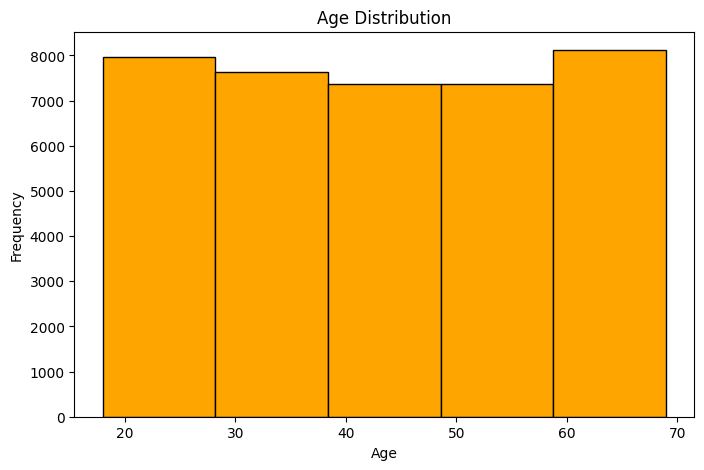

In [12]:
# age distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=5, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram represents the frequency of customers within different age ranges. It suggests a relatively uniform distribution, with slightly more individuals in the younger (20s) and older (60s) age groups.

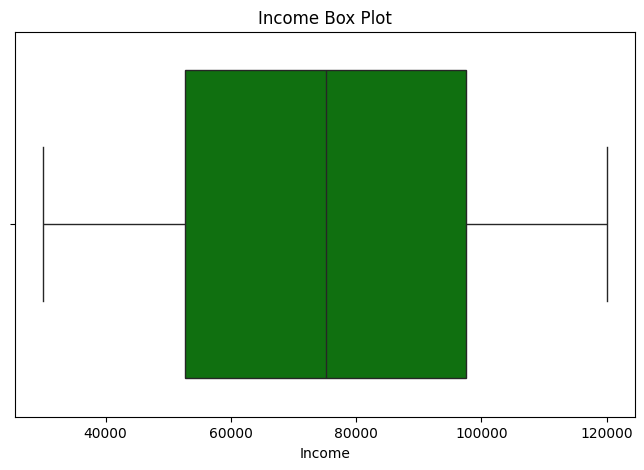

In [ ]:
# identifying outliers in income 
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Income'], color='green')
plt.title('Income Box Plot')
plt.show()

The box plot visualizes the distribution of income. The median is centered within the interquartile range, with a few outliers on both the lower and upper ends.

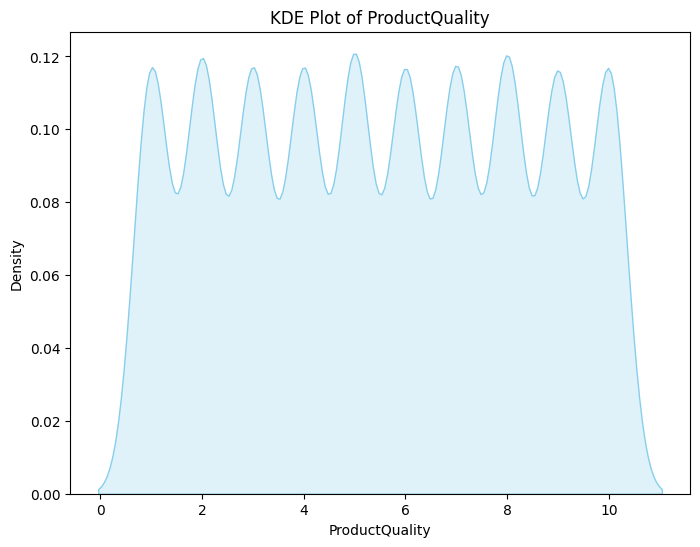

In [ ]:
# visualizing the probability density function of ProductQuality 
plt.figure(figsize=(8, 6))
sns.kdeplot(df['ProductQuality'], fill=True, color='skyblue')
plt.title('KDE Plot of ProductQuality')
plt.xlabel('ProductQuality')
plt.ylabel('Density')
plt.show()

KDE Plot of ProductQuality: This plot shows a kernel density estimation (KDE) of ProductQuality with evenly spaced peaks, indicating cyclic or periodic variations in the data distribution.

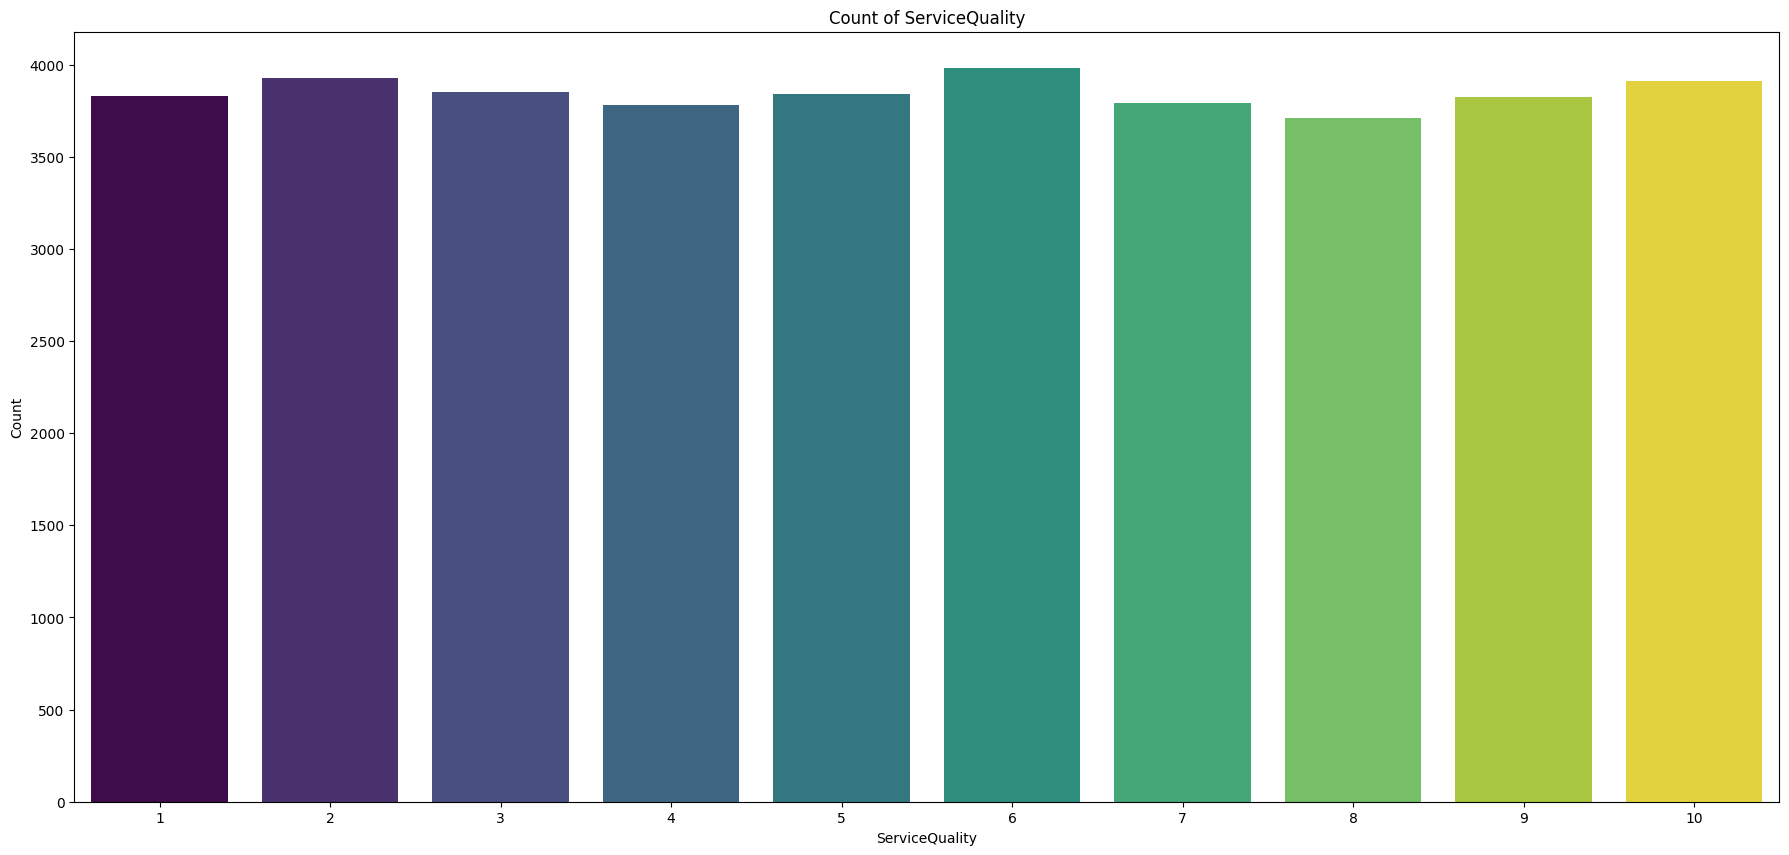

In [ ]:
# SeviceQuality ratings
plt.figure(figsize=(22, 10))
sns.countplot(x='ServiceQuality', data=df, hue='ServiceQuality', palette='viridis', legend=False)
plt.title('Count of ServiceQuality')
plt.xlabel('ServiceQuality')
plt.ylabel('Count')
plt.show()

The bar chart displays the number of responses for various service quality scores. The counts are relatively balanced, with slightly higher values for middle-range scores.

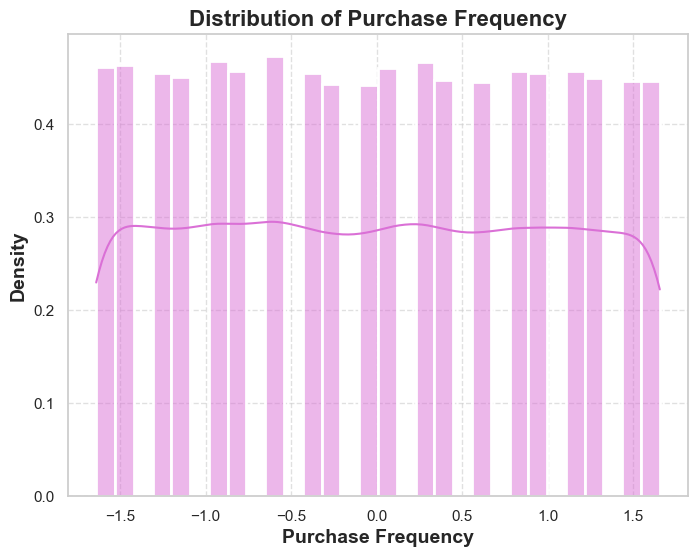

In [ ]:
# purchase frequency distrubition
plt.figure(figsize=(8, 6))
sns.histplot(df['PurchaseFrequency'], bins=30, color='orchid', kde=True, stat='density', linewidth=2)
plt.title('Distribution of Purchase Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
sns.set(style='whitegrid')
plt.show()

The distribution appears uniform, with customers spread relatively evenly across different purchase frequencies. This uniformity may suggest a consistent level of engagement or purchasing behavior among customers, without significant peaks or dips in purchase frequency.

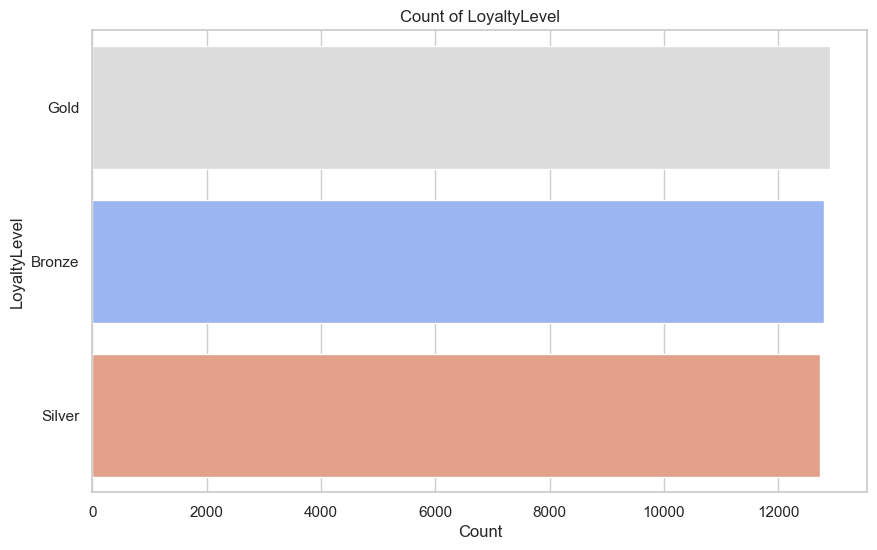

In [ ]:
# loyaltylevels
plt.figure(figsize=(10, 6))
sns.countplot(y='LoyaltyLevel', data=df, hue='LoyaltyLevel', order=df['LoyaltyLevel'].value_counts().index, palette='coolwarm', legend=False)
plt.title('Count of LoyaltyLevel')
plt.xlabel('Count')
plt.ylabel('LoyaltyLevel')
plt.show()

This bar chart shows the distribution of customers across different loyalty levels (Gold, Silver, and Bronze). Silver appears to have the highest count, indicating a majority of customers belong to this tier.

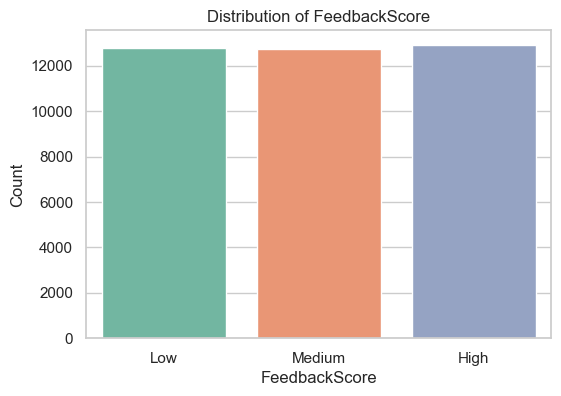

In [ ]:
# feedback scores
plt.figure(figsize=(6, 4))
sns.countplot(x='FeedbackScore', data=df, hue='FeedbackScore', palette='Set2', legend=False)
plt.title('Distribution of FeedbackScore')
plt.xlabel('FeedbackScore')
plt.ylabel('Count')
plt.show()

This chart compares the count of feedback scores across three categories: Low, Medium, and High. The counts are nearly identical, suggesting evenly distributed feedback.

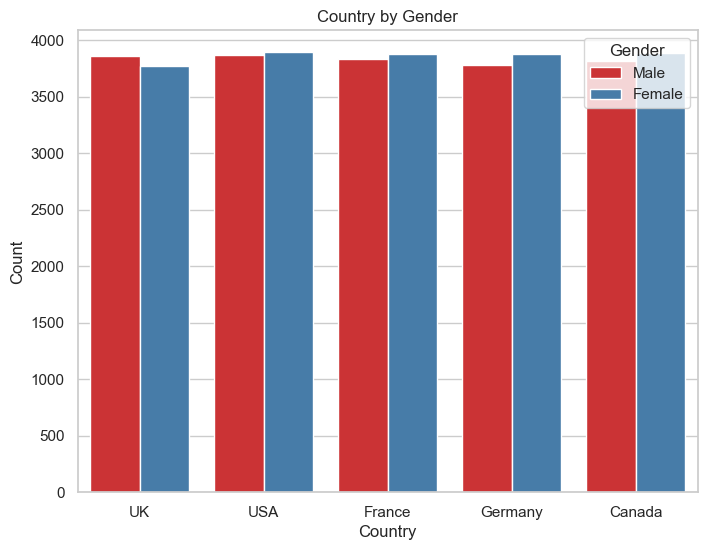

In [ ]:
# distribution of country and gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Country', hue='Gender', data=df, palette='Set1')
plt.title('Country by Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Country by Gender Bar Plot: This bar plot represents the distribution of males and females across various countries, showing a nearly equal gender count in each country.

In [ ]:
# customer data not useful
df.drop(columns=['CustomerID'],inplace=True)

In [21]:
df

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.00
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.00
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.00
3,32,Female,UK,73884,7,10,16,Low,Gold,100.00
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
...,...,...,...,...,...,...,...,...,...,...
38439,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,28,Female,USA,105587,7,5,16,High,Silver,100.00


# Data Preprocessing:

# Label encoding

In [42]:
#import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
categorical_data = ['Gender','Country','FeedbackScore','LoyaltyLevel']
numerical_data = ['Age','Income','ProductQuality','ServiceQuality','PurchaseFrequency']

In [30]:
# LabelEncoder for categorical columns
label_encoder = LabelEncoder()
# Apply LabelEncoder to the categorical columns
df[categorical_data] = df[categorical_data].apply(label_encoder.fit_transform)

In [31]:
df

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,3,83094,5,8,5,1,0,100.00
1,69,1,3,86860,10,2,8,2,1,100.00
2,46,0,4,60173,8,10,18,2,2,100.00
3,32,0,3,73884,7,10,16,1,1,100.00
4,60,1,3,97546,6,4,13,1,0,82.00
...,...,...,...,...,...,...,...,...,...,...
38439,55,0,4,80880,6,3,14,0,2,75.85
38440,44,1,0,42845,5,10,1,1,2,100.00
38441,43,0,4,71433,7,9,7,2,0,100.00
38442,28,0,4,105587,7,5,16,0,2,100.00


In [33]:
# Scaling numeric data
standard_scaler = StandardScaler()

# Apply the pipeline
df[numerical_data] = standard_scaler.fit_transform(df[numerical_data])

In [34]:
df

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,0.835071,1,3,0.308653,-0.172196,0.871845,-0.945943,1,0,100.00
1,1.703326,1,3,0.453636,1.568051,-1.214549,-0.425611,2,1,100.00
2,0.167182,0,4,-0.573759,0.871952,1.567310,1.308830,2,2,100.00
3,-0.767862,0,3,-0.045913,0.523903,1.567310,0.961942,1,1,100.00
4,1.102227,1,3,0.865025,0.175854,-0.519084,0.441609,1,0,82.00
...,...,...,...,...,...,...,...,...,...,...
38439,0.768282,0,4,0.223418,0.175854,-0.866816,0.615053,0,2,75.85
38440,0.033605,1,0,-1.240851,-0.172196,1.567310,-1.639720,1,2,100.00
38441,-0.033184,0,4,-0.140272,0.523903,1.219578,-0.599055,2,0,100.00
38442,-1.035017,0,4,1.174587,0.523903,-0.171352,0.961942,0,2,100.00


In [48]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
Age,1.000000,-0.002730,0.005702,-0.000097,-0.009215,0.004847,-0.003799,-0.003010,-0.007225,0.157510
Gender,-0.002730,1.000000,0.003952,0.001750,-0.001437,-0.004026,-0.002426,0.003354,0.000757,-0.007579
Country,0.005702,0.003952,1.000000,-0.008993,0.003418,-0.004432,-0.001012,-0.000174,-0.014417,-0.002209
Income,-0.000097,0.001750,-0.008993,1.000000,-0.001607,0.005130,0.001219,0.006998,0.001170,0.245129
ProductQuality,-0.009215,-0.001437,0.003418,-0.001607,1.000000,0.005206,0.000060,0.003990,0.002651,0.547690
ServiceQuality,0.004847,-0.004026,-0.004432,0.005130,0.005206,1.000000,0.006110,0.001314,-0.009562,0.553614
PurchaseFrequency,-0.003799,-0.002426,-0.001012,0.001219,0.000060,0.006110,1.000000,-0.002408,0.002738,0.113018
FeedbackScore,-0.003010,0.003354,-0.000174,0.006998,0.003990,0.001314,-0.002408,1.000000,0.000924,0.001219
LoyaltyLevel,-0.007225,0.000757,-0.014417,0.001170,0.002651,-0.009562,0.002738,0.000924,1.000000,-0.003099
SatisfactionScore,0.157510,-0.007579,-0.002209,0.245129,0.547690,0.553614,0.113018,0.001219,-0.003099,1.000000


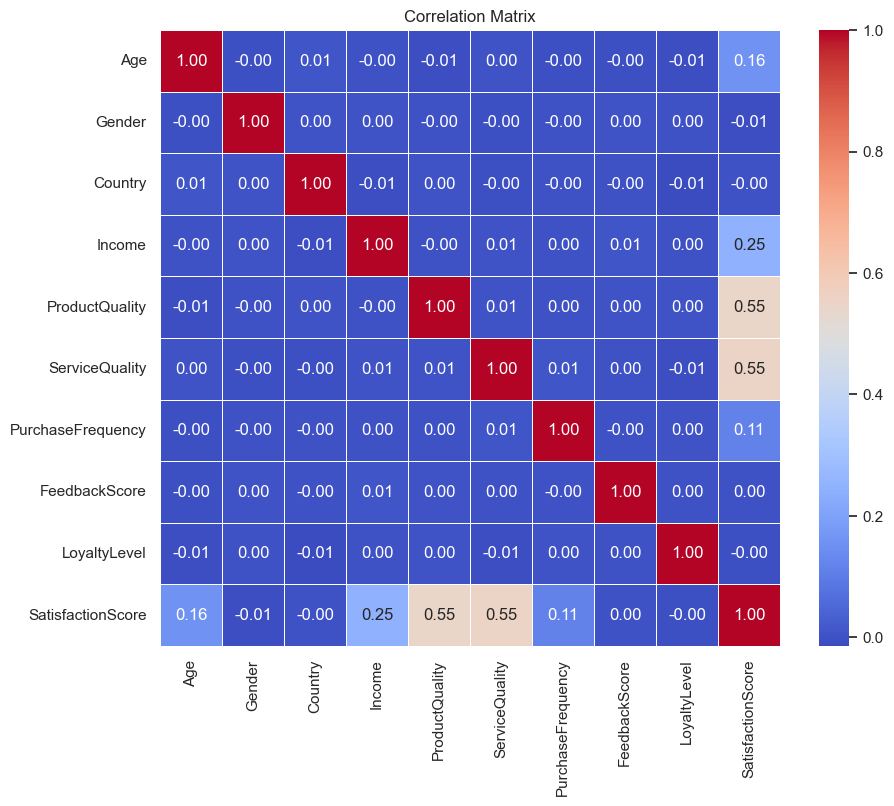

In [50]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Higher correlations are indicated by darker shades. Satisfaction score shows moderate positive correlations with income (0.25), product quality (0.55), and service quality (0.55), suggesting these factors are important predictors of customer satisfaction. Other variables, like age, gender, and country, have little to no correlation with satisfaction, implying a lesser impact.

# Splitting Data for training

In [35]:
X = df.drop(['SatisfactionScore'],axis=1)
y = df['SatisfactionScore']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [37]:
X_train

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel
22249,0.367549,0,3,-0.702303,-1.216344,-1.214549,-1.466276,1,0
345,0.434338,1,2,-1.410396,-1.216344,0.524113,-1.466276,0,0
31699,0.501127,1,0,0.958575,1.568051,0.524113,-1.639720,1,0
22719,-0.968228,1,4,0.271156,0.175854,-0.171352,0.094721,2,1
6420,1.369382,1,3,-0.259654,0.871952,0.871845,-0.425611,2,1
...,...,...,...,...,...,...,...,...,...
6265,0.233971,0,2,-1.575475,1.568051,-0.866816,-1.466276,2,0
11284,-0.500706,0,2,-0.016501,-0.172196,-0.519084,-1.119388,1,1
38158,1.502960,1,0,-1.700516,-1.216344,-0.519084,-0.945943,2,0
860,0.501127,0,0,-1.633453,-1.564394,0.871845,-0.078723,0,1


In [38]:
X_test

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel
10312,0.567916,1,2,-1.271765,0.871952,-1.562281,-0.078723,2,0
18970,0.501127,0,2,0.738636,1.568051,-0.866816,0.094721,0,2
36401,1.169016,0,0,1.122846,0.175854,0.176381,0.615053,1,1
9289,1.035438,1,1,-0.295457,-1.216344,0.176381,0.268165,2,1
31854,0.501127,0,1,1.048891,0.523903,0.524113,-1.292832,0,0
...,...,...,...,...,...,...,...,...,...
30130,0.501127,1,3,0.132063,-0.172196,-0.519084,1.482274,2,0
23076,0.835071,1,3,1.384439,0.871952,0.176381,1.655718,1,2
36145,1.369382,1,4,-1.373900,1.568051,-1.214549,0.441609,0,0
30660,-0.500706,0,3,1.312563,0.523903,-0.519084,1.482274,2,1


In [39]:
y_test

10312     88.38
18970    100.00
36401    100.00
9289      84.96
31854    100.00
          ...  
30130     88.32
23076    100.00
36145     89.92
30660    100.00
2942      84.54
Name: SatisfactionScore, Length: 7689, dtype: float64

In [41]:
y_train

22249     52.38
345       72.70
31699    100.00
22719     89.22
6420     100.00
          ...  
6265      79.28
11284     77.37
38158     63.31
860       57.12
15795     98.58
Name: SatisfactionScore, Length: 30755, dtype: float64

In [43]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 7.382462922619547
MSE: 84.88297405997798
R2: 0.6970577667339888


In [44]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 5.701197008713747
MSE: 65.73020932864353
R2: 0.7654128330495158


# Conclusion:

## Random Forest is outperforming Linear Regression in terms of MAE, MSE, and R². The higher R² and lower error metrics suggest that Random Forest is better at capturing the non-linear relationships in the data, which is likely due to its ability to model more complex interactions between features.

### While Linear Regression provides a good starting point, Random Forest is the preferred model for this problem due to its higher accuracy and better overall performance.

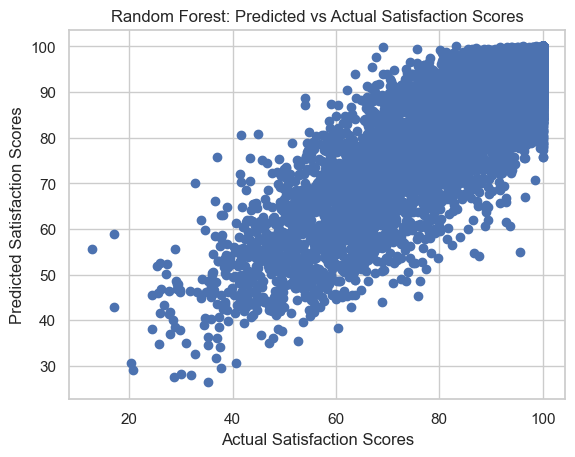

In [45]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred_rf)
plt.title("Random Forest: Predicted vs Actual Satisfaction Scores")
plt.xlabel("Actual Satisfaction Scores")
plt.ylabel("Predicted Satisfaction Scores")
plt.show()


#### The points cluster around this line, especially in the mid-range of satisfaction scores, indicating that the model captures some of the satisfaction trend. However, there is considerable spread, particularly at high scores, suggesting the model may struggle with precise prediction for extreme values.